## Data evaluation of measured emission values by means of optical spectroscopy

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np
from scipy import optimize

### 1. Define function for FRET/Quenching probability calculation

The measured emission values by means of fluorometer (in our case Fluoroskan Ascent FL) must be corrected in the first step by means of background signal, bleed-through and direct excitation. The correction is done according to Börner et al. [1]. Using the corrected values, the FRET signal and the quenching probability as well as the hill function can be calculated. 
___
**Förster Resonance Energy Transfer (FRET)** is calculated from:        
$$FRET=\frac{I_{D.ex}^{A.em}}{I_{D.ex}^{D.em}+I_{D.ex}^{A.em}}$$\
$I$.. intensity\
$D$.. donor fluorophore\
$A$.. acceptor fluorophore\
$ex$.. excitation\
$em$.. emission\
\
The **quenching probability (QP)** is calculated from: 
$$QP=1-\frac{I_D}{I_{D0}}$$\
$I_{D}$.. intensity of the donor\
$I_{D0}$.. intensity of the donor without addition of metal ions, buffer or complexing reagent\
\
The well-known **Hill equation** is defined as:
$$FRET_{[Mg(II)]} = FRET_{min} + FRET_{max} \frac{[Mg(II)]^{n}}{K_{eq.Mg(II)} + [Mg(II)]^{n}}$$\
$n$.. Hill coefficient\
$K_{eq}$.. associated equilibrium constant


[1] Börner, R., Kowerko, D., Hadzic, M. C., König, S. L., Ritter, M., & Sigel, R. K. (2018). Simulations of camera-based single-molecule fluorescence experiments. PloS one, 13(4)

In [2]:
def calculate_FRET_QP(data_file, cor_param):
    # read data file
    data = pd.read_csv(data_file)
    data.columns = ['concentration', 'temperature','x', 'y','z']
    # x = measurement at 538-604 nm
    # y = measurement at 646-680 nm
    # z = measurement at 538-680 nm
    
    # correct data and calculate FRET
    temps = data.temperature.unique()
    iterator = 0
    qp_values, correct_x, correct_z = [], [], []
    
    for i in temps:
        filtered_df= []
        filtered_df = data[data.temperature == i]
        qp_values.extend((1-(filtered_df.x/filtered_df.x[iterator]))*100)
        correct_x.extend(((filtered_df.x - cor_param[str(i)][0]) - (cor_param["bleedthrough_acceptor"] * filtered_df.z) - (cor_param["direct_excitation_donor"]*0))*0.2)
        correct_z.extend(((filtered_df.z - cor_param[str(i)][1]) - (cor_param["bleedthrough_donor"] * filtered_df.x) - (cor_param["direct_excitation_acceptor"]*filtered_df.y))*0.24)
        iterator = iterator + len(filtered_df-1)
 
    data['correct_x'] = correct_x
    data['correct_z'] = correct_z
    data['FRET'] = data['correct_z']/(data['correct_x'] + data['correct_z'])    
    data['QP'] = qp_values
    return data

def hill_function(Mg,k_eq,n):
    return min(filtered_df.FRET) + (max(filtered_df.FRET) - min(filtered_df.FRET)) * (Mg**n / (k_eq + Mg**n))

### 2. Call parameters und functions


The values for background signal, bleed-through and direct excitation are determined in advance and stored in a dictionary.

In [3]:
# dictonary for correction parameter
correction_patameter = {
    
# "temperature": [blank_x, blank_z]
    "20": [0.104,0.604],
    "25": [0.103,0.594],
    "30": [0.092,0.571],
    "35": [0.089,0.567],
    "40": [0.089,0.555],
    "43": [0.076,0.526],
    
    "bleedthrough_donor": 0.25,
    "bleedthrough_acceptor": 0,
    
    "direct_excitation_donor": 0,
    "direct_excitation_acceptor": 0.8,
}

df = calculate_FRET_QP('example_data/example_data.csv', correction_patameter)
print(df)

    concentration  temperature         x         y         z  correct_x  \
0            0.00           20  2.330474  2.385818  4.556314   0.445295   
1            0.01           20  2.494638  2.508133  4.784019   0.478128   
2            0.10           20  2.559295  2.550134  4.946433   0.491059   
3            1.00           20  3.143641  3.160844  6.547635   0.607928   
4            2.50           20  2.945218  3.104777  6.893043   0.568244   
..            ...          ...       ...       ...       ...        ...   
67          10.00           43  1.181422  1.893348  4.163830   0.221084   
68          25.00           43  0.915365  1.713088  3.569832   0.167873   
69          50.00           43  0.649950  1.536611  2.703561   0.114790   
70          75.00           43  0.480414  1.424933  3.378807   0.080883   
71         100.00           43  0.534506  1.431797  3.449168   0.091701   

    correct_z      FRET         QP  
0    0.350650  0.440546   0.000000  
1    0.371965  0.437558  

### 3. Plot FRET value per temperatur

    concentration  temperature         x         y          z  correct_x  \
0            0.00           20  2.330474  2.385818   4.556314   0.445295   
1            0.01           20  2.494638  2.508133   4.784019   0.478128   
2            0.10           20  2.559295  2.550134   4.946433   0.491059   
3            1.00           20  3.143641  3.160844   6.547635   0.607928   
4            2.50           20  2.945218  3.104777   6.893043   0.568244   
5            5.00           20  2.669469  3.128927   8.268086   0.513094   
6            7.50           20  2.554460  3.075923   8.347425   0.490092   
7           10.00           20  2.449063  3.328413  10.857633   0.469013   
8           25.00           20  1.873530  3.305583  13.785840   0.353906   
9           50.00           20  1.294954  3.201640  15.871437   0.238191   
10          75.00           20  0.978647  2.999920  18.033343   0.174929   
11         100.00           20  0.857210  2.750897  13.796870   0.150642   

    correct

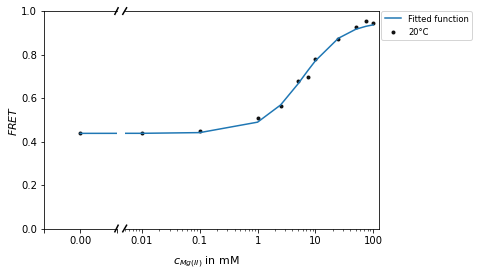

In [4]:
# filter the temperature 
filtered_df = df[df.temperature == 20]
print(filtered_df)

# define plot
f, (left, right) = plt.subplots(1, 2, sharey=True, sharex=False, gridspec_kw={'width_ratios': [1, 3.5]})

plt.subplots_adjust(wspace = .05)

f.text(0.5, 0, '$c_{Mg(II)}$ in mM', ha='center', fontsize=11)
f.text(0.04, 0.5, '$\mathit{FRET}$', va='center', rotation='vertical', fontsize=11)

# create values for x-scale
values= ['0','0','0.01','0.1','1','10','100']

# calculate Hill parameters
params, params_covariance = optimize.curve_fit(hill_function, filtered_df.concentration, filtered_df.FRET)
print('K_eq ='), print(params[0]), print('n ='), print(params[1])

# draw plot for the two plots
left.scatter(filtered_df.concentration, filtered_df.FRET, marker='.', color='black', linewidth=1, alpha=0.9, label=str(df.temperature[0])+'°C')
right.scatter(filtered_df.concentration, filtered_df.FRET, marker='.', color='black', linewidth=1, alpha=0.9, label=str(df.temperature[0])+'°C')
right.plot(filtered_df.concentration, hill_function(filtered_df.concentration, params[0], params[1]),
         label='Fitted function')
left.plot(filtered_df.concentration, hill_function(filtered_df.concentration, params[0], params[1]),
         label='Fitted function')

# specifications for the left plot
left.set_ylim([0,1])
left.set_xticklabels(['','0.00',''])
left.set_xlim(-0.005,0.005)
left.spines['right'].set_visible(False)

# specifications for the right plot
right.set_xscale('log')
right.set_xticklabels(values)
right.set_xlim(0.005, 125)
right.spines['left'].set_visible(False)
right.get_yaxis().set_visible(False)   

# define strokes
d = .015 
kwargs = dict(transform=left.transAxes, color='k', clip_on=False)
left.plot((1-d*1.5,1+d*1.5), (-d,+d), ** kwargs)
left.plot((1-d*1.5,1+d*1.5),(1-d,1+d), ** kwargs)
kwargs.update(transform=right.transAxes)
right.plot((-d/2,+d/2), (1-d,1+d), ** kwargs)
right.plot((-d/2,+d/2), (-d,+d), ** kwargs)

# legend
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', fontsize='small', borderaxespad=0)

plt.show()

### 4. Plot FRET values per temperatures


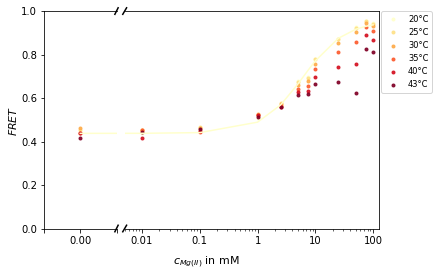

In [5]:
f, (left, right) = plt.subplots(1, 2, sharey=True, sharex=False, gridspec_kw={'width_ratios': [1, 3.5]})

plt.subplots_adjust(wspace = .05)

f.text(0.5, 0, '$c_{Mg(II)}$ in mM', ha='center', fontsize=11)
f.text(0.04, 0.5, '$\mathit{FRET}$', va='center', rotation='vertical', fontsize=11)

# create values for x-scale
values= ['0','0','0.01','0.1','1','10','100']

# draw plot for the two plots
temps = df.temperature.unique()
palette = plt.get_cmap('YlOrRd',len(temps))

num=-1
for i in temps:
    num+=1
    filtered_df = df[df.temperature == i]
    params, params_covariance = optimize.curve_fit(hill_function, filtered_df.concentration, filtered_df.FRET)
    #print('K_eq ='), print(params[0]), print('n ='), print(params[1]) 
    left.scatter(filtered_df.concentration, filtered_df.FRET, marker='.', color=palette(num), linewidth=1, alpha=0.9, label=str(i)+'°C')
    right.scatter(filtered_df.concentration, filtered_df.FRET, marker='.', color=palette(num), linewidth=1, alpha=0.9, label=str(i)+'°C')
    if i == 20:
        right.plot(filtered_df.concentration, hill_function(filtered_df.concentration, params[0], params[1]), color=palette(num))
        left.plot(filtered_df.concentration, hill_function(filtered_df.concentration, params[0], params[1]),color=palette(num))
    
# specifications for the left plot
    left.set_ylim([0,1])
    left.set_xticklabels(['','0.00',''])
    left.set_xlim(-0.005,0.005)
    left.spines['right'].set_visible(False)

# specifications for the right plot
    right.set_xscale('log')
    right.set_xticklabels(values)
    right.set_xlim(0.005, 125)
    right.spines['left'].set_visible(False)
    right.get_yaxis().set_visible(False)   

# define strokes
d = .015 
kwargs = dict(transform=left.transAxes, color='k', clip_on=False)
left.plot((1-d*1.5,1+d*1.5), (-d,+d), ** kwargs)
left.plot((1-d*1.5,1+d*1.5),(1-d,1+d), ** kwargs)
kwargs.update(transform=right.transAxes)
right.plot((-d/2,+d/2), (1-d,1+d), ** kwargs)
right.plot((-d/2,+d/2), (-d,+d), ** kwargs)

# legend
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', fontsize='small', borderaxespad=0)
#plt.savefig("figure.svg")
plt.show()

### 5. Plot quenching propability per temperatures

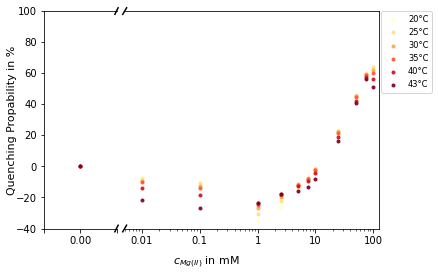

In [6]:
f, (left, right) = plt.subplots(1, 2, sharey=True, sharex=False, gridspec_kw={'width_ratios': [1, 3.5]})

plt.subplots_adjust(wspace = .05)

f.text(0.5, 0, '$c_{Mg(II)}$ in mM', ha='center', fontsize=11)
f.text(0.04, 0.5, 'Quenching Propability in %', va='center', rotation='vertical', fontsize=11)

# create values for x-scale
values= ['0','0','0.01','0.1','1','10','100']

# draw plot for the two plots
temps = df.temperature.unique()
palette = plt.get_cmap('YlOrRd',len(temps))

num=-1
for i in temps:
    num+=1
    filtered_df = df[df.temperature == i]
    left.scatter(filtered_df.concentration, filtered_df.QP, marker='.', color=palette(num), linewidth=1, alpha=0.9, label=str(i)+'°C')
    right.scatter(filtered_df.concentration, filtered_df.QP, marker='.', color=palette(num), linewidth=1, alpha=0.9, label=str(i)+'°C')

# specifications for the left plot
    left.set_ylim([-40,100])
    left.set_xticklabels(['','0.00',''])
    left.set_xlim(-0.005,0.005)
    left.spines['right'].set_visible(False)

# specifications for the right plot
    right.set_xscale('log')
    right.set_xticklabels(values)
    right.set_xlim(0.005, 125)
    right.spines['left'].set_visible(False)
    right.get_yaxis().set_visible(False)   

# define strokes
d = .015 
kwargs = dict(transform=left.transAxes, color='k', clip_on=False)
left.plot((1-d*1.5,1+d*1.5), (-d,+d), ** kwargs)
left.plot((1-d*1.5,1+d*1.5),(1-d,1+d), ** kwargs)
kwargs.update(transform=right.transAxes)
right.plot((-d/2,+d/2), (1-d,1+d), ** kwargs)
right.plot((-d/2,+d/2), (-d,+d), ** kwargs)

# legend
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', fontsize='small', borderaxespad=0)

plt.show()

### 6. Plot FRET values per concentrations

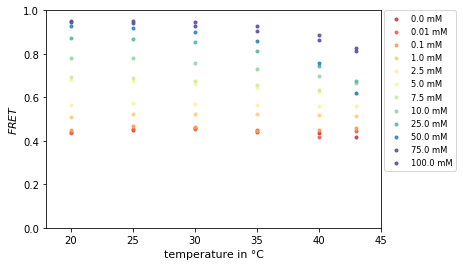

In [7]:
conc = df.concentration.unique()
palette = plt.get_cmap('Spectral',len(conc))

num=-1
for i in conc:
    num+=1
    filtered_df = df[df.concentration == i]
    plt.scatter(filtered_df.temperature, filtered_df.FRET, marker='.', color=palette(num+1), linewidth=1, alpha=0.9, label=str(i)+' mM')
    plt.axis( [18,45,0,1])
    plt.xlabel('temperature in °C', fontsize=11)
    plt.ylabel('$\mathit{FRET}$', fontsize=11)
    
# legend
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', fontsize='small', borderaxespad=0)

plt.show()